<a href="https://colab.research.google.com/github/miraqulass/MachineLearning/blob/MLPractices/latestApproach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Latest_Approach/

/content/drive/MyDrive/Latest_Approach


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import StackingRegressor

In [ ]:
data = pd.read_csv('compiled_data.csv')

In [ ]:
data.head()

,Vehicle_ID,Timestamp,Temperature,Vibration,Engine_RPM,Oil_Pressure,Fuel_Level,Pressure,Speed,Component_Health,Maintenance_Type,Maintenance_Duration
0,1,2022-01-10 13:21:15.444691200,23.829233,0.653487,1768.291154,30.433599,49.871689,22.938481,60.675282,93.267580,NaN,1
1,1,2022-01-18 03:27:53.933817600,23.829315,0.406105,1767.135123,31.375411,63.142473,37.328244,45.752518,92.888182,Preventive,1
2,1,2022-01-24 12:46:30.771148800,32.896064,0.608512,2120.981136,37.188562,50.919759,28.871118,54.556173,92.568786,NaN,1
3,2,2022-01-02 03:26:55.357727999,29.744214,0.575113,1776.629265,33.032915,61.726937,20.817084,64.731932,93.796980,NaN,4
4,2,2022-01-05 05:19:18.396566400,32.904253,0.261368,2762.120816,29.108329,63.241988,32.822321,66.591906,93.643078,Inspection,4


In [ ]:
data.describe()

,Vehicle_ID,Temperature,Vibration,Engine_RPM,Oil_Pressure,Fuel_Level,Pressure,Speed,Component_Health,Maintenance_Duration
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,50000.500000,26.012842,0.640161,2100.878821,38.000771,55.991941,29.989423,60.034684,94.451305,2.499170
std,28867.561571,5.460110,0.369740,544.438602,6.777740,13.549164,5.003125,10.000015,2.904004,1.118536
min,1.000000,1.513484,-0.509714,-72.656278,1.984781,-23.802304,4.698616,12.109055,88.652405,1.000000
25%,25000.750000,22.297195,0.400061,1730.010067,34.362235,48.672880,26.617076,53.296407,91.944613,1.000000
50%,50000.500000,25.890046,0.558848,2088.028787,38.752840,57.509861,29.985743,60.042135,94.464784,2.000000
75%,75000.250000,29.591190,0.766657,2459.104435,42.570274,65.157895,33.366254,66.749679,96.950739,4.000000
max,100000.000000,53.978411,2.805607,5068.881559,61.215642,103.413731,53.616702,105.357001,99.948217,4.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Vehicle_ID            300000 non-null  int64  
 1   Timestamp             300000 non-null  object 
 2   Temperature           300000 non-null  float64
 3   Vibration             300000 non-null  float64
 4   Engine_RPM            300000 non-null  float64
 5   Oil_Pressure          300000 non-null  float64
 6   Fuel_Level            300000 non-null  float64
 7   Pressure              300000 non-null  float64
 8   Speed                 300000 non-null  float64
 9   Component_Health      300000 non-null  float64
 10  Maintenance_Type      100000 non-null  object 
 11  Maintenance_Duration  300000 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 27.5+ MB


In [ ]:
data.isnull().sum()

Vehicle_ID                   0
Timestamp                    0
Temperature                  0
Vibration                    0
Engine_RPM                   0
Oil_Pressure                 0
Fuel_Level                   0
Pressure                     0
Speed                        0
Component_Health             0
Maintenance_Type        200000
Maintenance_Duration         0
dtype: int64

In [ ]:
data.nunique()

Vehicle_ID              100000
Timestamp               299997
Temperature             300000
Vibration               300000
Engine_RPM              300000
Oil_Pressure            300000
Fuel_Level              300000
Pressure                300000
Speed                   300000
Component_Health        300000
Maintenance_Type             3
Maintenance_Duration         4
dtype: int64

In [ ]:
data.shape

(300000, 12)

<Axes: xlabel='Temperature'>

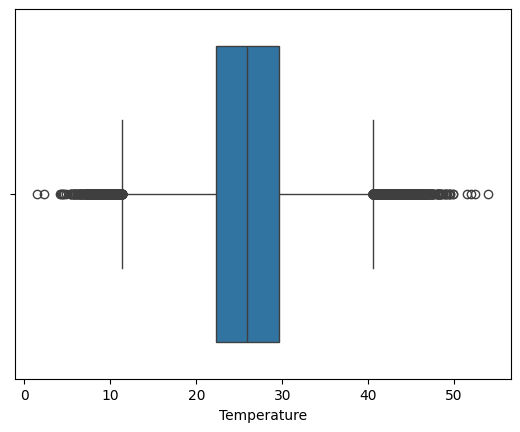

In [ ]:
sns.boxplot(x = data['Temperature'])

<Axes: xlabel='Vibration'>

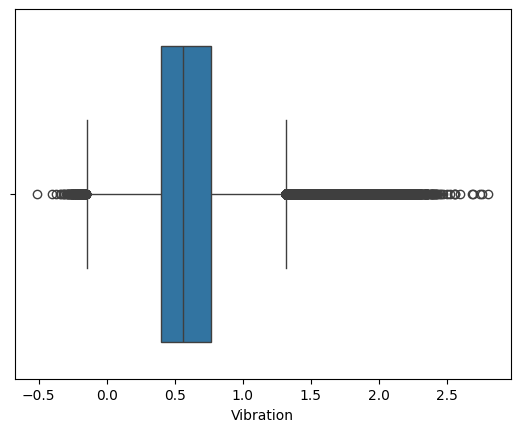

In [ ]:
sns.boxplot(x = data['Vibration'])

<Axes: xlabel='Engine_RPM'>

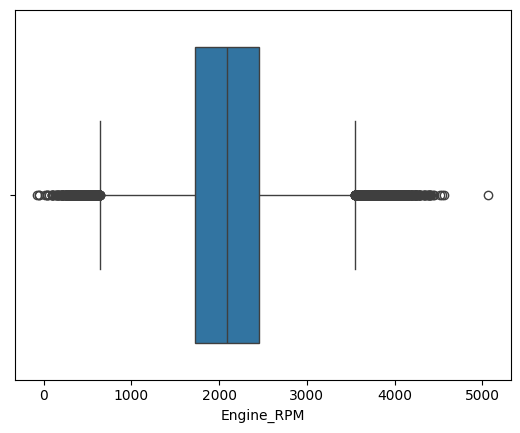

In [ ]:
sns.boxplot(x = data['Engine_RPM'])

<Axes: xlabel='Oil_Pressure'>

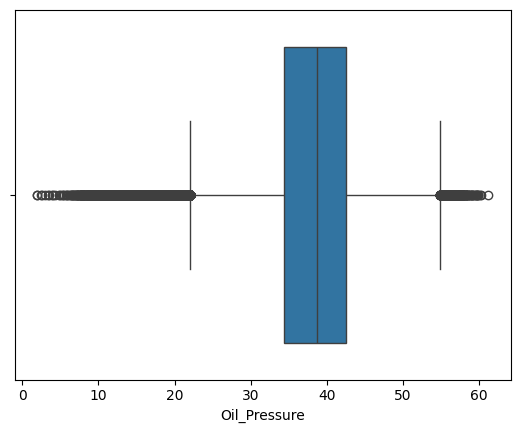

In [ ]:
sns.boxplot(x = data['Oil_Pressure'])

<Axes: xlabel='Fuel_Level'>

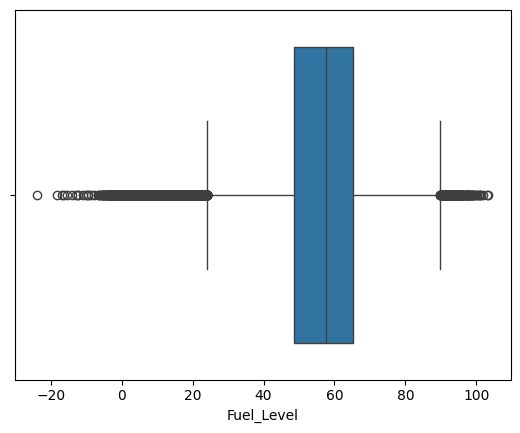

In [ ]:
sns.boxplot(x = data['Fuel_Level'])

<Axes: xlabel='Pressure'>

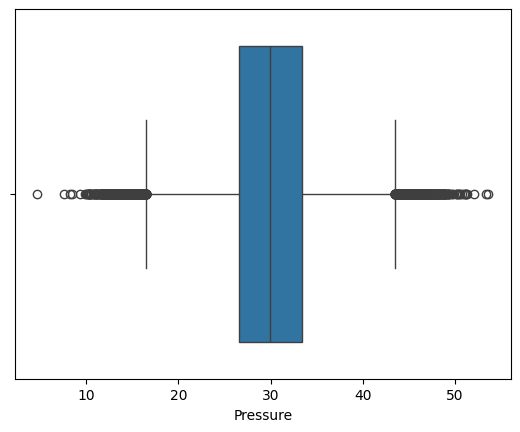

In [ ]:
sns.boxplot(x = data['Pressure'])

<Axes: xlabel='Speed'>

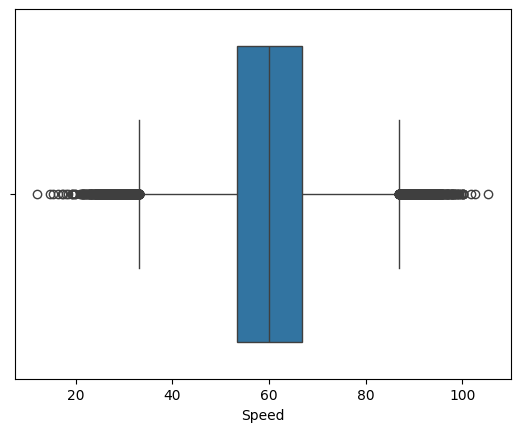

In [ ]:
sns.boxplot(x = data['Speed'])

<ipython-input-19-8cb30d67aefb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


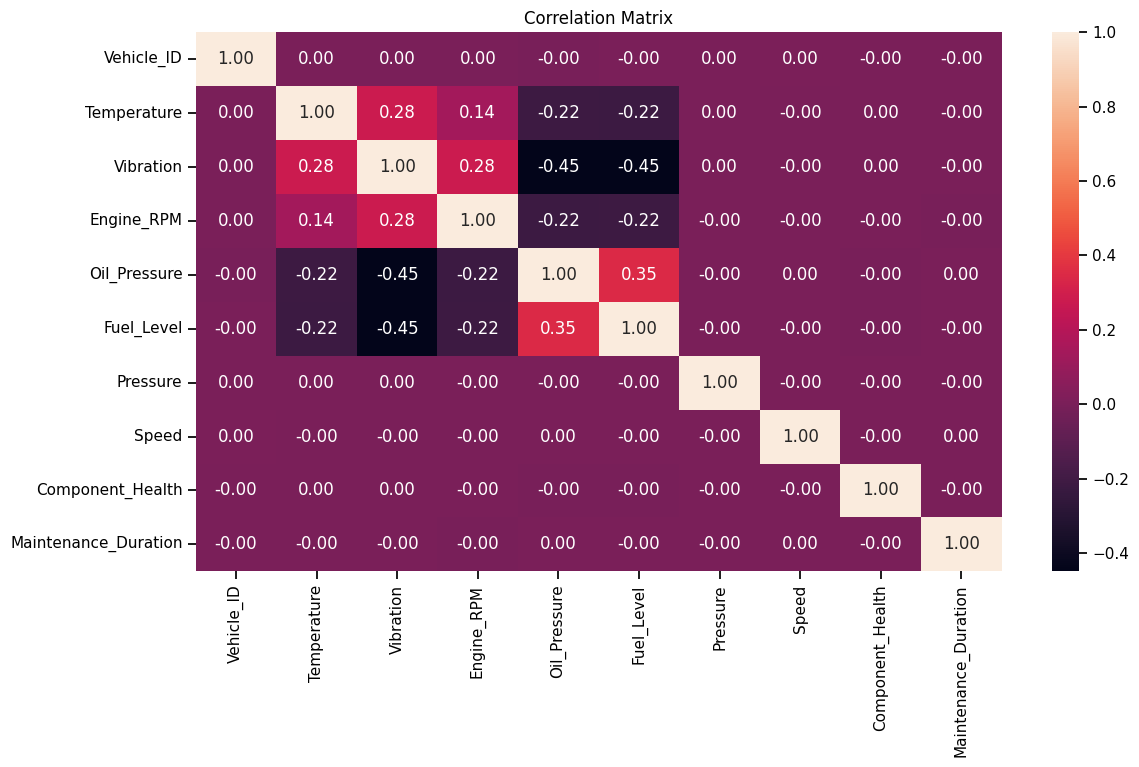

In [ ]:
correlation_matrix = data.corr()
sns.set_context('notebook', font_scale=1.0, rc={'lines.linewitdh': 2.5})
plt.figure(figsize = (13,7))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

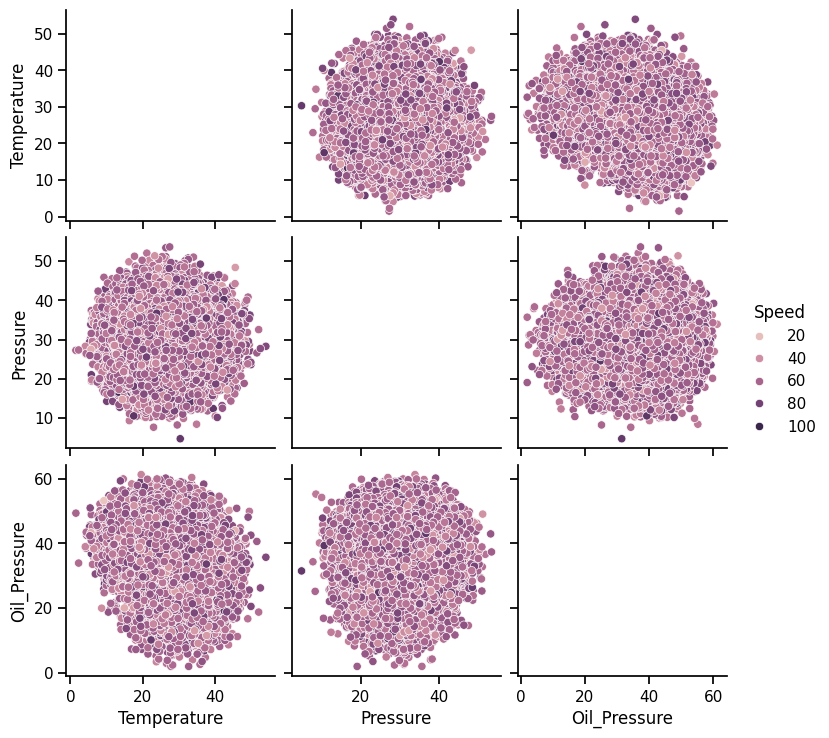

In [ ]:
sns.pairplot(data = data[['Temperature', 'Speed', 'Pressure', 'Oil_Pressure']], hue = 'Speed')

In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp']).dt.strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
data['Year'] = pd.to_datetime(data['Timestamp']).dt.year
data['Month'] = pd.to_datetime(data['Timestamp']).dt.month
data['Day'] = pd.to_datetime(data['Timestamp']).dt.day
data['Hour'] = pd.to_datetime(data['Timestamp']).dt.hour
data['Weekday'] = pd.to_datetime(data['Timestamp']).dt.weekday

In [ ]:
data.head(20)

,Vehicle_ID,Timestamp,Temperature,Vibration,Engine_RPM,Oil_Pressure,Fuel_Level,Pressure,Speed,Component_Health,Maintenance_Type,Maintenance_Duration,Year,Month,Day,Hour,Weekday
0,1,2022-01-10 13:21:15,23.829233,0.653487,1768.291154,30.433599,49.871689,22.938481,60.675282,93.267580,NaN,1,2022,1,10,13,0
1,1,2022-01-18 03:27:53,23.829315,0.406105,1767.135123,31.375411,63.142473,37.328244,45.752518,92.888182,Preventive,1,2022,1,18,3,1
2,1,2022-01-24 12:46:30,32.896064,0.608512,2120.981136,37.188562,50.919759,28.871118,54.556173,92.568786,NaN,1,2022,1,24,12,0
3,2,2022-01-02 03:26:55,29.744214,0.575113,1776.629265,33.032915,61.726937,20.817084,64.731932,93.796980,NaN,4,2022,1,2,3,6
4,2,2022-01-05 05:19:18,32.904253,0.261368,2762.120816,29.108329,63.241988,32.822321,66.591906,93.643078,Inspection,4,2022,1,5,5,2
5,2,2022-01-08 09:22:59,23.159145,0.418190,2161.499899,34.780518,67.458595,30.127503,83.407463,93.484617,NaN,4,2022,1,8,9,5
6,3,2022-01-08 22:35:39,17.459234,0.417923,2417.397710,39.620981,74.954343,25.398046,45.812495,96.893000,NaN,1,2022,1,8,22,5
7,3,2022-01-10 14:35:16,35.536236,1.010364,2686.348089,34.186049,37.300916,28.006808,70.424916,96.809680,Corrective,1,2022,1,10,14,0
8,3,2022-01-14 20:00:59,24.111339,0.320358,1481.085062,43.977977,93.722963,29.695680,69.035325,96.598370,NaN,1,2022,1,14,20,4
9,4,2022-01-09 22:10:51,24.473714,0.220252,1836.187408,42.304778,61.270122,29.233318,55.168773,96.501639,NaN,2,2022,1,9,22,6


In [ ]:
data.sort_values(['Vehicle_ID', 'Timestamp'], inplace=True)

In [ ]:
data['Time_Since_Last_Maintenance'] = (pd.to_datetime(data['Timestamp']) - pd.to_datetime(data.groupby('Vehicle_ID')['Timestamp'].transform('shift'))).dt.days.fillna(0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 0 to 299999
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Vehicle_ID                   300000 non-null  int64  
 1   Timestamp                    300000 non-null  object 
 2   Temperature                  300000 non-null  float64
 3   Vibration                    300000 non-null  float64
 4   Engine_RPM                   300000 non-null  float64
 5   Oil_Pressure                 300000 non-null  float64
 6   Fuel_Level                   300000 non-null  float64
 7   Pressure                     300000 non-null  float64
 8   Speed                        300000 non-null  float64
 9   Component_Health             300000 non-null  float64
 10  Maintenance_Type             100000 non-null  object 
 11  Maintenance_Duration         300000 non-null  int64  
 12  Year                         300000 non-null  int64  
 13 

In [ ]:
data['Max_Time'] = data.groupby('Vehicle_ID')['Timestamp'].transform('max')

In [ ]:
data['Max_Time'] = pd.to_datetime(data['Max_Time'])
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [ ]:
data['RUL'] = (data['Max_Time'] - data['Timestamp']).dt.days

In [ ]:
data.head()

,Vehicle_ID,Timestamp,Temperature,Vibration,Engine_RPM,Oil_Pressure,Fuel_Level,Pressure,Speed,Component_Health,Maintenance_Type,Maintenance_Duration,Year,Month,Day,Hour,Weekday,Time_Since_Last_Maintenance,Max_Time,RUL
0,1,2022-01-10 13:21:15,23.829233,0.653487,1768.291154,30.433599,49.871689,22.938481,60.675282,93.267580,NaN,1,2022,1,10,13,0,0.0,2022-01-24 12:46:30,13
1,1,2022-01-18 03:27:53,23.829315,0.406105,1767.135123,31.375411,63.142473,37.328244,45.752518,92.888182,Preventive,1,2022,1,18,3,1,7.0,2022-01-24 12:46:30,6
2,1,2022-01-24 12:46:30,32.896064,0.608512,2120.981136,37.188562,50.919759,28.871118,54.556173,92.568786,NaN,1,2022,1,24,12,0,6.0,2022-01-24 12:46:30,0
3,2,2022-01-02 03:26:55,29.744214,0.575113,1776.629265,33.032915,61.726937,20.817084,64.731932,93.796980,NaN,4,2022,1,2,3,6,0.0,2022-01-08 09:22:59,6
4,2,2022-01-05 05:19:18,32.904253,0.261368,2762.120816,29.108329,63.241988,32.822321,66.591906,93.643078,Inspection,4,2022,1,5,5,2,3.0,2022-01-08 09:22:59,3


In [ ]:
print(data[['Vehicle_ID', 'Timestamp', 'Time_Since_Last_Maintenance','Max_Time', 'RUL']])

        Vehicle_ID           Timestamp  Time_Since_Last_Maintenance  \
0                1 2022-01-10 13:21:15                          0.0   
1                1 2022-01-18 03:27:53                          7.0   
2                1 2022-01-24 12:46:30                          6.0   
3                2 2022-01-02 03:26:55                          0.0   
4                2 2022-01-05 05:19:18                          3.0   
...            ...                 ...                          ...   
299995       99999 2022-01-09 14:36:12                          6.0   
299996       99999 2022-01-13 10:36:23                          3.0   
299997      100000 2022-01-09 05:03:00                          0.0   
299998      100000 2022-01-15 18:27:02                          6.0   
299999      100000 2022-01-20 16:24:56                          4.0   

                  Max_Time  RUL  
0      2022-01-24 12:46:30   13  
1      2022-01-24 12:46:30    6  
2      2022-01-24 12:46:30    0  
3      2022

In [ ]:
X = data[['Temperature', 'Vibration', 'Engine_RPM', 'Oil_Pressure', 'Fuel_Level', 'Pressure', 'Speed',
                   'Year', 'Month', 'Day', 'Hour', 'Weekday', 'Time_Since_Last_Maintenance']]

In [ ]:
y = data['RUL']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf_test_preds = rf_model.predict(X_test)

In [ ]:
rf_test_preds = np.round(rf_test_preds).astype(int)

In [ ]:
rf_test_preds

array([11,  2,  3, ...,  5,  0, 10])

In [ ]:
rf_mae_test = mean_absolute_error(y_test, rf_test_preds)

In [ ]:
rf_mse_test = mean_squared_error(y_test, rf_test_preds)

In [ ]:
rf_r2_test = r2_score(y_test, rf_test_preds)

In [ ]:
print("Mean Absolute Error on Testing Set (Random Forest):", rf_mae_test)
print("Mean Squared Error on Testing Set (Random Forest):", rf_mse_test)
print("R-squared on Testing Set (Random Forest):", rf_r2_test)

Mean Absolute Error on Testing Set (Random Forest): 2.1694833333333334
Mean Squared Error on Testing Set (Random Forest): 8.576616666666666
R-squared on Testing Set (Random Forest): 0.6603222106160009


In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

In [ ]:
mlp_model.fit(X_train_scaled, y_train)

MLPRegressor(max_iter=500, random_state=42)

In [ ]:
mlp_test_preds = mlp_model.predict(X_test_scaled)

In [ ]:
mlp_test_preds = np.round(mlp_test_preds).astype(int)

In [ ]:
mlp_test_preds

array([11,  2,  3, ...,  5,  0, 11])

In [ ]:
mlp_mae_test = mean_absolute_error(y_test, mlp_test_preds)
mlp_r2_test = r2_score(y_test, mlp_test_preds)
print("Mean Absolute Error on Testing Set (Neural Network):", mlp_mae_test)
print("R-squared on Testing Set (Neural Network):", rf_r2_test)

Mean Absolute Error on Testing Set (Neural Network): 2.14555
R-squared on Testing Set (Neural Network): 0.6603222106160009


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
nn_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation ='linear')
])

In [ ]:
nn_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

In [ ]:
nn_test_preds = nn_model.predict(X_test_scaled).flatten()

1875/1875 [==============================] - 4s 2ms/step


In [ ]:
nn_test_preds

array([10.427299  ,  1.6482908 ,  2.9462466 , ...,  4.9337373 ,
        0.17976177, 10.573824  ], dtype=float32)

In [ ]:
nn_mae_test = mean_absolute_error(y_test, nn_test_preds)
nn_mse_test = mean_squared_error(y_test, nn_test_preds)
nn_r2_test = r2_score(y_test, nn_test_preds)

print("Mean Absolute Error on Testing Set (Neural Network):", nn_mae_test)
print("Mean Square Error on Testing Set (Neural Network):", nn_mse_test)
print("R-squared on Testing Set (Neural Network):", nn_r2_test)

Mean Absolute Error on Testing Set (Neural Network): 2.1622743855386974
Mean Square Error on Testing Set (Neural Network): 8.309396137360638
R-squared on Testing Set (Neural Network): 0.6709055072935208
